In [1]:
# @title
from IPython.display import HTML as html

html('''
<div style="
    text-align: center;
    font-family: 'Trebuchet MS', sans-serif;
    font-size: 42px;
    font-weight: bold;
    margin-top: 20px;
">
🏦 Bank Customer Churn Prediction
</div>
''')



##  Project Overview
Predict whether a bank customer will **exit (churn)** or **stay**, using features such as CreditScore, Age, Balance, Tenure, and activity indicators.  
This notebook follows an end-to-end ML workflow: data loading → preprocessing → EDA → balancing → model training → evaluation → comparison.

---

##  Dataset Summary
- **Train set:** 165,034 rows × 14 cols (includes target `Exited`)  
- **Test set:** 110,023 rows × 13 cols  
- Dropped: `CustomerId`, `Surname` (non-informative)

**Important features:** CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Geography, Gender

---

##  Data Inspection
- No missing values found  
- `CreditScore ≈ 656 ± 80`, `Age ≈ 38 ± 9`, `Balance ≈ 55 k ± 63 k`  
- `Gender:` Male 93 k / Female 72 k  
- `Geography:` France 94 k / Spain 36 k / Germany 35 k  

---

##  Exploratory Data Analysis
- Histograms for numeric features  
- Bar plots for categorical variables  
- Correlation heatmap and boxplots to spot trends & outliers  

---

##  Encoding & Balancing
- One-Hot Encoded `Geography` and `Gender` (`drop_first=True`)  
- Handled class imbalance with **SMOTE**  
  - Before: Exited 0 → 130 k / Exited 1 → 35 k  
  - After: Balanced ≈ 130 k each  

---

##  Models & Results

| Model | Accuracy (%) | Precision (%) | Recall (%) | F1 (%) |
|:------|:-------------:|:--------------:|:-----------:|:------:|
| Logistic Regression | 71.29 | 70.98 | 72.45 | 71.71 |
| K-Nearest Neighbors | 71.16 | 67.67 | 81.52 | 73.95 |
| Decision Tree | 86.94 | 86.47 | 87.72 | 87.09 |
| Random Forest | 86.42 | 86.73 | 86.13 | 86.43 |
| XGBoost | 90.63 | 92.91 | 88.07 | 90.42 |
| **LightGBM ⭐** | **91.20** | **93.47** | **88.67** | **91.02** |


 Tree-based models ≫ linear models. **LightGBM** performed best overall.

---

##  Insights
- Ensembles (RF, XGB, LGB) capture nonlinear relationships effectively.  
- KNN had high recall but lower precision.  
- LightGBM delivered the best accuracy–F1 balance (~ 90.8%).  

---

##  Recommendations
1. Apply scaling before LR/KNN/SVM.  
2. Use k-fold Cross-Validation for robustness.  
3. Tune hyper-parameters (e.g., num_leaves, learning_rate).  
4. Analyze feature importance / SHAP values.  
5. Build an `sklearn` Pipeline and save model via `joblib`.  

---

##  Conclusion
- Completed full ML pipeline: cleaning → EDA → SMOTE → multi-model training → comparison.  
- **Best model:** LightGBM (Accuracy ≈ 90.85%, F1 ≈ 0.906).  
- Future work: scaling, tuning, SHAP explainability, and Streamlit deployment.  

---


In [2]:
#from google.colab import drive

# Mount Google Drive
#drive.mount('/content/drive')

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
train_data = pd.read_csv(r'D:\DS & AI (ITV)\Machine Learning\ML Bank Churn Prediction\data\train.csv')
test_data = pd.read_csv(r'D:\DS & AI (ITV)\Machine Learning\ML Bank Churn Prediction\data\test.csv')

## Exploring Training Dataset

In [5]:
# Display top 5 rows of the dataset
# Aim - to check whether the customer has left the bank or not
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
# Display last 5 rows of the dataset
train_data.tail()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.0,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.0,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.0,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.0,1,0.0,1.0,71173.03,0
165033,165033,15732798,Ulyanov,850,France,Male,31.0,1,0.0,1,1.0,0.0,61581.79,1


In [7]:
# Find shape of our dataset i.e. no. of rows and no. of columns
train_data.shape

(165034, 14)

In [8]:
print("No. of rows", train_data.shape[0])
print("No. of columns", train_data.shape[1])

No. of rows 165034
No. of columns 14


In [9]:
# Get information about the dataset i.e. datatypes of columns, memory requirement
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [10]:
# Check null values in the dataset
# data.isnull() # display the data as boolean values
train_data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
# Overall statistics about the dataset
# By default it will display statistics for numeric data
train_data.describe(include='all')

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034,165034.000000,165034,165034,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
unique,NaN,NaN,2797,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Hsia,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2456,NaN,94215,93150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,82516.5000,1.569201e+07,NaN,656.454373,NaN,NaN,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,NaN,80.103340,NaN,NaN,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,NaN,597.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,NaN,659.000000,NaN,NaN,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,NaN,710.000000,NaN,NaN,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000


In [12]:
# Display column names
train_data.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

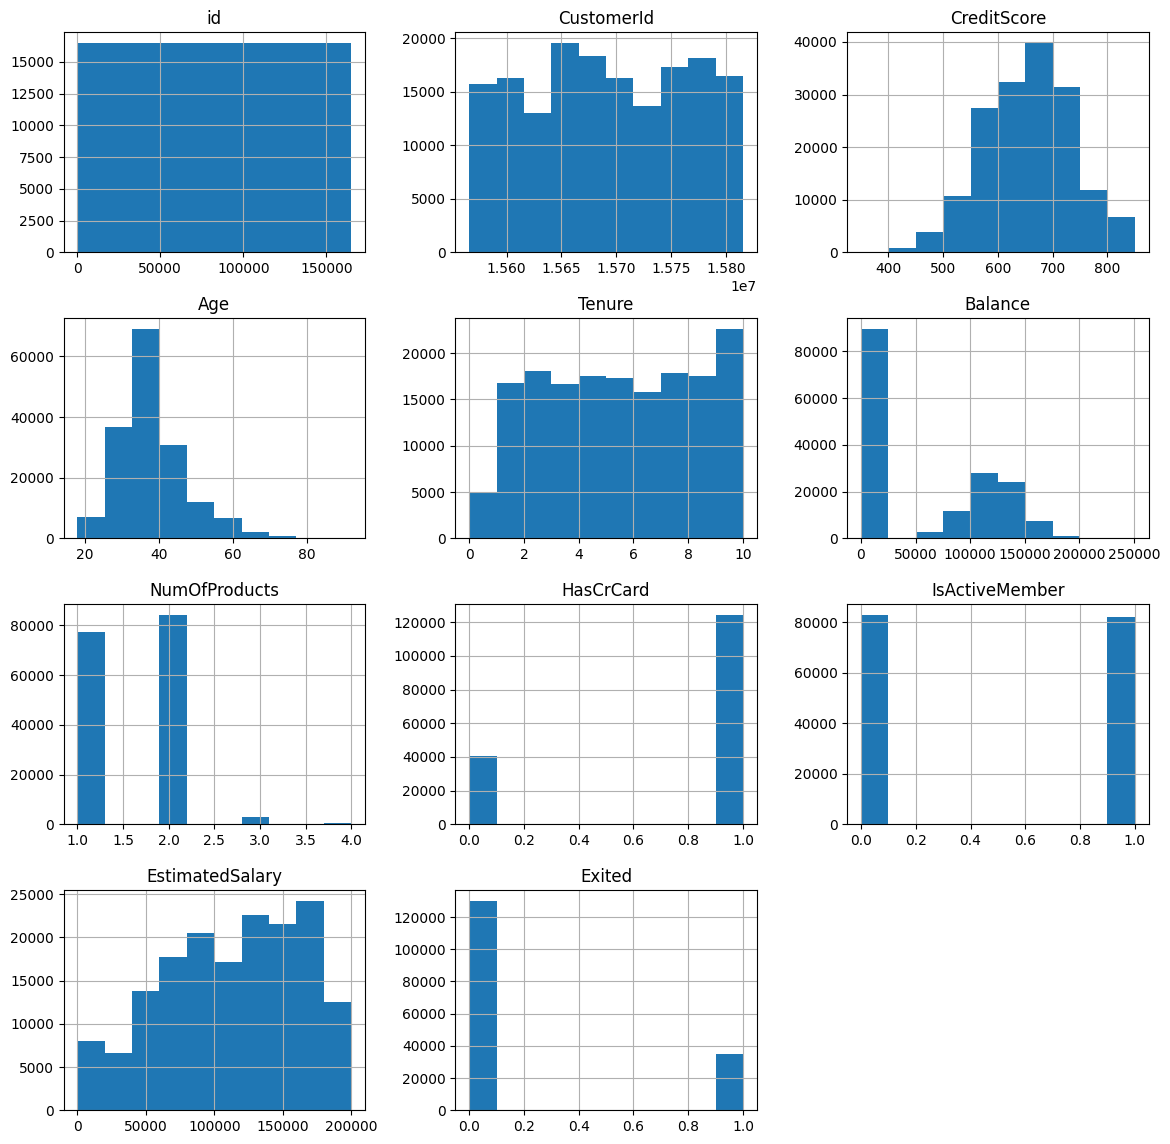

In [13]:
#Plot histogram grid
from matplotlib import pyplot as plt
train_data.hist(figsize=(14,14))
plt.show()

## Detecting and Removing Outlier

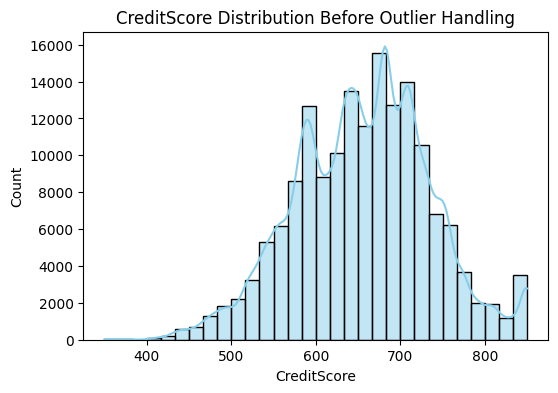

Skewness of CreditScore: -0.059
--------------------------------------------------


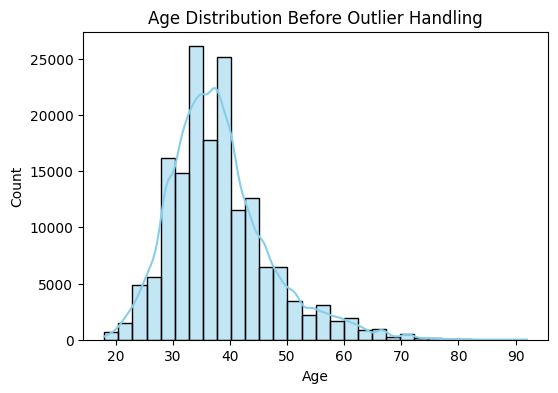

Skewness of Age: 0.968
--------------------------------------------------


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ---- Step 1: Check skewness and visualize before outlier removal ----
features = ['CreditScore', 'Age']

for col in features:
    plt.figure(figsize=(6,4))
    sns.histplot(train_data[col], kde=True, color='skyblue', bins=30)
    plt.title(f'{col} Distribution Before Outlier Handling')
    plt.show()

    print(f"Skewness of {col}:", round(train_data[col].skew(), 3))
    print("-" * 50)


In [15]:
# ---- Step 2: Detect outliers using IQR method ----
for col in features:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = train_data[(train_data[col] < lower_bound) | (train_data[col] > upper_bound)]
    print(f"\n📊 {col} Outlier Detection")
    print(f"Lower Bound: {lower_bound:.2f}")
    print(f"Upper Bound: {upper_bound:.2f}")
    print(f"Number of outliers in {col}: {len(outliers)}")
    print("-" * 50)



📊 CreditScore Outlier Detection
Lower Bound: 427.50
Upper Bound: 879.50
Number of outliers in CreditScore: 253
--------------------------------------------------

📊 Age Outlier Detection
Lower Bound: 17.00
Upper Bound: 57.00
Number of outliers in Age: 6394
--------------------------------------------------


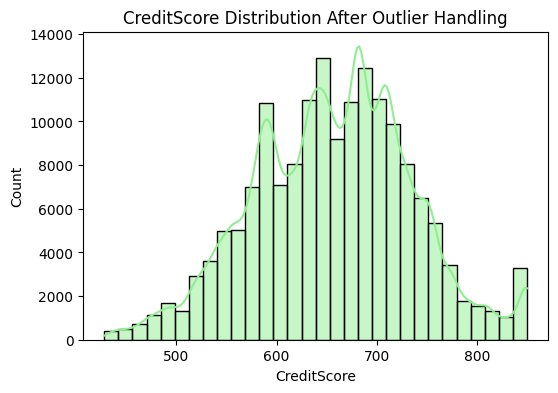

Skewness of CreditScore after cleaning: -0.026


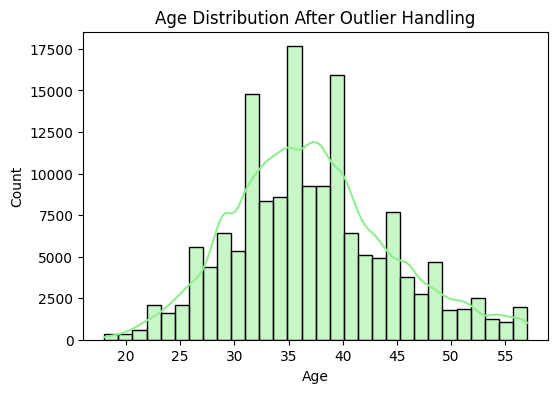

Skewness of Age after cleaning: 0.362


In [16]:
# ---- Step 3: Remove outliers and visualize after cleaning ----
for col in features:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    train_data = train_data[(train_data[col] >= lower_bound) & (train_data[col] <= upper_bound)]

    # Plot after cleaning
    plt.figure(figsize=(6,4))
    sns.histplot(train_data[col], kde=True, color='lightgreen', bins=30)
    plt.title(f'{col} Distribution After Outlier Handling')
    plt.show()

    print(f"Skewness of {col} after cleaning:", round(train_data[col].skew(), 3))
    print("=" * 60)


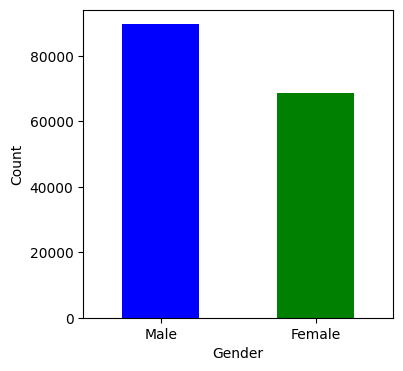

Counter({'Male': 89662, 'Female': 68738})

In [17]:
# Bar plot for "Gender"
from collections import Counter
plt.figure(figsize=(4,4))
train_data['Gender'].value_counts().plot.bar(color=['b', 'g'])
plt.ylabel('Count')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

# Display count of each class
Counter(train_data.Gender)

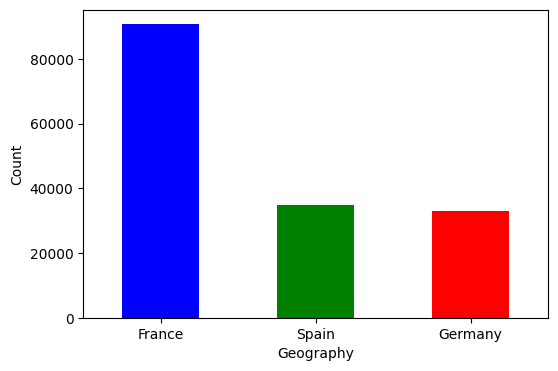

Counter({'France': 90658, 'Spain': 34721, 'Germany': 33021})

In [18]:
# Bar plot for "Geography"
plt.figure(figsize=(6,4))
train_data['Geography'].value_counts().plot.bar(color=['b', 'g', 'r'])
plt.ylabel('Count')
plt.xlabel('Geography')
plt.xticks(rotation=0)
plt.show()

# Display count of each class
Counter(train_data.Geography)

## Exploring Testing Dataset

In [19]:
test_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [20]:
test_data.tail()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58
110022,275056,15663942,Tuan,621,France,Female,37.0,7,87848.39,1,1.0,0.0,24210.56


In [21]:
test_data.shape

(110023, 13)

In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [23]:
test_data.describe(include='all')

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,110023.000000,1.100230e+05,110023,110023.000000,110023,110023,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000,110023.000000
unique,NaN,NaN,2708,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Hsia,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1606,NaN,63171,61942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,220045.000000,1.569210e+07,NaN,656.530789,NaN,NaN,38.122205,4.996637,55333.611354,1.553321,0.753043,0.495233,112315.147765
std,31761.048671,7.168499e+04,NaN,80.315415,NaN,NaN,8.861550,2.806148,62788.519675,0.544714,0.431244,0.499980,50277.048244
min,165034.000000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000
25%,192539.500000,1.563286e+07,NaN,597.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74440.325000
50%,220045.000000,1.569018e+07,NaN,660.000000,NaN,NaN,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117832.230000
75%,247550.500000,1.575693e+07,NaN,710.000000,NaN,NaN,42.000000,7.000000,120145.605000,2.000000,1.000000,1.000000,154631.350000


In [24]:
test_data = test_data.drop(['CustomerId','Surname'], axis=1)

In [25]:
test_data = pd.get_dummies(test_data, drop_first = True)

## Removing irrelevant features

In [26]:
# Dropping irrelevant features
train_data = train_data.drop(['CustomerId','Surname'], axis=1)

In [27]:
train_data.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


## Encoding Categorical Data

In [28]:
# Convert categorical values into numbers
train_data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [29]:
# passing data directly to this will create dummy variable trap
# scenario in which these dummy variables are highly correlated that means one variable can be predicted from others
# pd.get_dummies(data)
# In this case 3 columns France, Germany and Spain are created
# From any 2 columns we can easily predict the 3rd column. In this case, we will drop the first column
train_data = pd.get_dummies(train_data, drop_first = True)

In [30]:
train_data.head()

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,False,False,True
1,1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,False,False,True
2,2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,False,False,True
3,3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,False,False,True
4,4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,True,True


## Heatmap for expressing correlation

<Axes: >

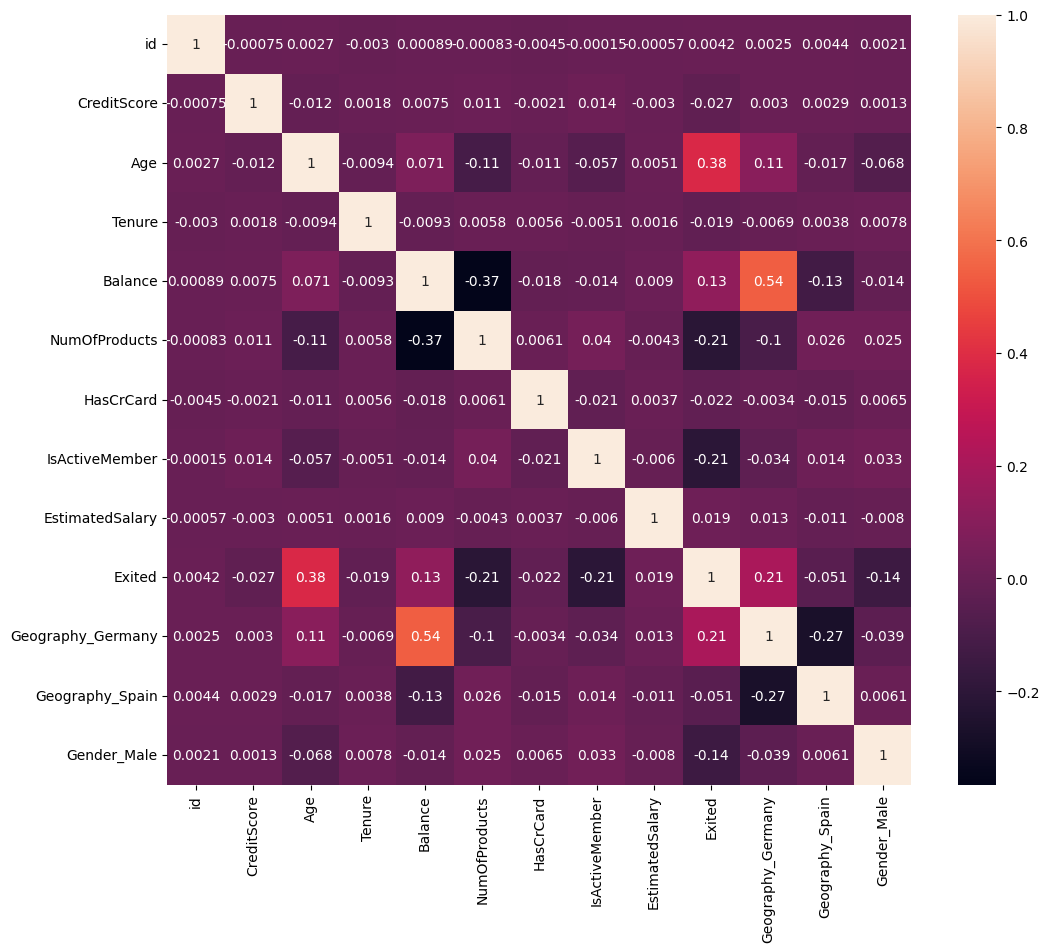

In [31]:

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))  # Adjust width and height as needed
sns.heatmap(train_data.iloc[:,0:15].corr(),annot=True)

## Handle Imbalanced Dataset

In [32]:

# Imbalanced data - where the target class has uneven distribution
train_data['Exited'].value_counts()

Exited
0    125985
1     32415
Name: count, dtype: int64

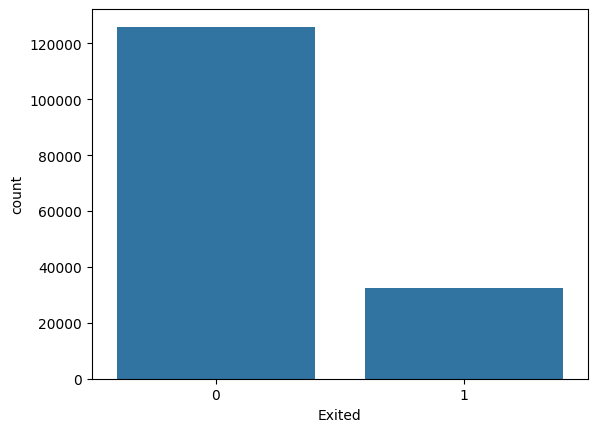

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=train_data['Exited'])
plt.show()

### Handle Imbalance Dataset with SMOTE

In [34]:
# oversampling - oversample the minority class with replacement
# undersampling - randomly delete rows from majority class
# undersampling is avoided as we can loose valuable data
# SMOTE stands synthetic minority oversampling
# SMOTE generates virtual training records by linear interpolation for the minority class
# we are not generating duplicate data points but creating synthetic data points that are slightly different from original data points

In [35]:
X = train_data.drop('Exited',axis=1)
X

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0,668,33.0,3,0.00,2,1.0,0.0,181449.97,False,False,True
1,1,627,33.0,1,0.00,2,1.0,1.0,49503.50,False,False,True
2,2,678,40.0,10,0.00,2,1.0,0.0,184866.69,False,False,True
3,3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,False,False,True
4,4,716,33.0,5,0.00,2,1.0,1.0,15068.83,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,False,True,False
165030,165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,False,False,True
165031,165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,False,False,True
165032,165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,False,True,False


In [36]:
y = train_data['Exited']
y

0         0
1         0
2         0
3         0
4         0
         ..
165029    0
165030    0
165031    0
165032    0
165033    1
Name: Exited, Length: 158400, dtype: int64

In [37]:
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X,y)

In [38]:
y_res.value_counts()

Exited
0    125985
1    125985
Name: count, dtype: int64

## Split data into train set and test set

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.20, random_state=42)

## Feature Scaling

In [40]:
# All linear machine learning algorithms require feature scaling. Ex KNN, ANN, Support vectors, Linear Regression and logistic Regression
# Non- linear machine learning algorithms are decision tree, random forest
# The algorithm that is not distance based is not affected by feature scaling

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [42]:
X_train

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
74021,77138,657,35.0,5,0.00,2,0.0,1.0,39891.84,False,False,True
75019,78174,668,31.0,9,107141.27,1,0.0,0.0,193014.26,False,False,True
94674,98609,699,31.0,1,118894.22,1,0.0,0.0,49848.86,False,False,True
5982,6201,713,39.0,6,0.00,2,1.0,1.0,51229.17,False,False,False
35827,37311,596,39.0,1,0.00,1,1.0,1.0,108419.41,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
119879,124867,764,35.0,6,117302.62,1,1.0,0.0,68701.73,False,False,True
103694,108005,632,38.0,8,0.00,2,1.0,0.0,146891.07,False,False,True
131932,137392,682,34.0,1,138053.79,1,1.0,1.0,142956.48,True,False,False
146867,152984,709,39.0,4,0.00,2,1.0,1.0,140941.47,False,False,True


# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 42) # create an instance of it
log.fit(X_train, y_train)
y_pred1 = log.predict(X_test)

c:\Users\rohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test,y_pred1)

0.7129420169067746

In [45]:
precision_score(y_test,y_pred1) # pc=TP/(FP+TP)

0.7098834733459797

In [46]:
recall_score(y_test,y_pred1) # rc=TP(TP+FN)

0.7245248725749733

In [47]:
f1_score(y_test,y_pred1)

0.7171294485725459

# KNeighbours Classifier

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [49]:
y_pred2 = knn.predict(X_test)

In [50]:
accuracy_score(y_test,y_pred2)

0.7116521808151764

In [51]:
precision_score(y_test,y_pred2)

0.6767464742538537

In [52]:
recall_score(y_test,y_pred2)

0.8152831008732072

In [53]:
f1_score(y_test,y_pred2)

0.7395831466513737

# Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [55]:
y_pred3 = dt.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred3)

0.8694487438980831

In [57]:
precision_score(y_test,y_pred3)

0.8647374980526562

In [58]:
recall_score(y_test,y_pred3)

0.8772768580346912

In [59]:
f1_score(y_test,y_pred3)

0.8709620476610768

# Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42,max_depth=5,min_samples_leaf=5,min_samples_split=5,criterion='gini')
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [61]:
y_pred4 = rf.predict(X_test)

In [62]:
accuracy_score(y_test,y_pred4)

0.8642298686351549

In [63]:
precision_score(y_test,y_pred4)

0.8673855090916325

In [64]:
recall_score(y_test,y_pred4)

0.8613536686554191

In [65]:
f1_score(y_test,y_pred4)

0.8643590658578169

# Gradient Boosting Classifier

## XGBOOST

In [66]:
import xgboost as xgb
gbc = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
gbc.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [67]:
y_pred5 = gbc.predict(X_test)

In [68]:
accuracy_score(y_test,y_pred5)

0.9063578997499703

In [69]:
precision_score(y_test,y_pred5)

0.929137140475198

In [70]:
recall_score(y_test,y_pred5)

0.8807143703820776

In [71]:
f1_score(y_test,y_pred5)

0.9042779772409176

## LightBGM

In [72]:
from lightgbm import LGBMClassifier

In [73]:
lgb = LGBMClassifier(random_state=42)
lgb.fit(X_train, y_train)
y_pred6 = lgb.predict(X_test)

[LightGBM] [Info] Number of positive: 100676, number of negative: 100900
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1807
[LightGBM] [Info] Number of data points in the train set: 201576, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499444 -> initscore=-0.002222
[LightGBM] [Info] Start training from score -0.002222


In [74]:
accuracy_score(y_test,y_pred6)

0.9120728658173592

In [75]:
precision_score(y_test,y_pred6)

0.9347771761765931

In [76]:
recall_score(y_test,y_pred6)

0.886799162353313

In [77]:
f1_score(y_test,y_pred6)

0.9101563292037551

#Accuracy Comparison

In [78]:
final_data = pd.DataFrame({'Models':['LR','KNN','DT','RF','GBC','LGB'],
                          'Accuracy': [accuracy_score(y_test, y_pred1), accuracy_score(y_test, y_pred2), accuracy_score(y_test, y_pred3), accuracy_score(y_test, y_pred4), accuracy_score(y_test, y_pred5), accuracy_score(y_test,y_pred6)]
                          })

In [79]:
final_data

,Models,Accuracy
0,LR,0.712942
1,KNN,0.711652
2,DT,0.869449
3,RF,0.864230
4,GBC,0.906358
5,LGB,0.912073


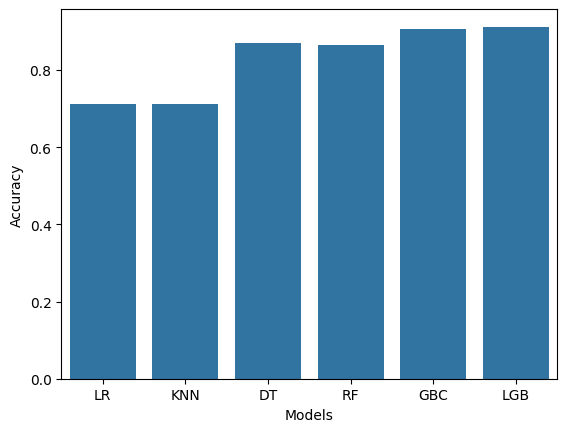

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Models', y='Accuracy', data=final_data)
plt.show()

# Precision Comparison

In [81]:
final_data = pd.DataFrame({'Models':['LR','KNN','DT','RF','GBC','LGB'],
                          'Precision': [precision_score(y_test, y_pred1), precision_score(y_test, y_pred2), precision_score(y_test, y_pred3), precision_score(y_test, y_pred4), precision_score(y_test, y_pred5), precision_score(y_test, y_pred6)]
                          })

In [82]:
final_data

,Models,Precision
0,LR,0.709883
1,KNN,0.676746
2,DT,0.864737
3,RF,0.867386
4,GBC,0.929137
5,LGB,0.934777


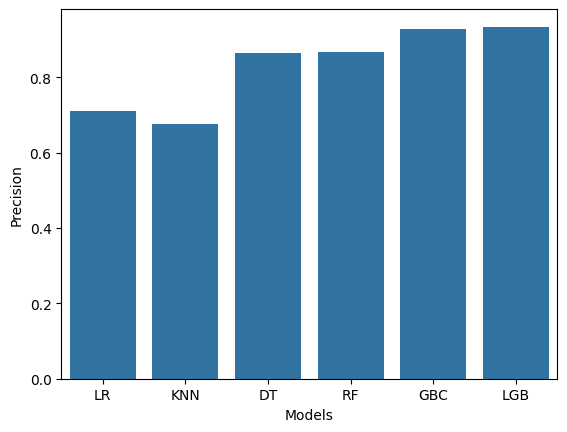

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Models', y='Precision', data=final_data)
plt.show()

#Recall Comparison

In [84]:
final_data = pd.DataFrame({'Models':['LR','KNN','DT','RF','GBC','LGB'],
                          'Recall': [recall_score(y_test, y_pred1), recall_score(y_test, y_pred2), recall_score(y_test, y_pred3), recall_score(y_test, y_pred4), recall_score(y_test, y_pred5), recall_score(y_test,y_pred6)]
                          })

In [85]:
final_data

,Models,Recall
0,LR,0.724525
1,KNN,0.815283
2,DT,0.877277
3,RF,0.861354
4,GBC,0.880714
5,LGB,0.886799


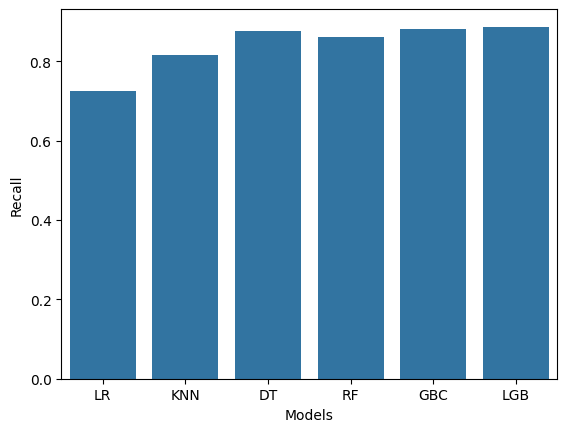

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x='Models', y='Recall', data=final_data)
plt.show()

# Best Model

In [87]:
# Initialize models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
models = {
    'Logistic Regression': LogisticRegression(random_state = 42),
    'K-Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100,random_state=42,max_depth=5,min_samples_leaf=5,min_samples_split=5,criterion='gini'),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': xgb.XGBClassifier(objective='binary:logistic', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

# Train and evaluate models
best_acc = 0
best_model = None
# best_acc will store the highest accuracy achieved so far.
# best_model will store the model that achieved the highest accuracy.


#models.items() returns a list of (key, value) pairs from the dictionary.
#name → the model name (string).
#model → the actual sklearn model object.
#This loop allows you to train and evaluate each model automatically.

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(name, "Accuracy:", round(acc, 2))
    if acc > best_acc:
        best_acc = acc
        best_model = model


c:\Users\rohan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.71
K-Neighbors Accuracy: 0.71
Random Forest Accuracy: 0.86
Decision Tree Accuracy: 0.87
Gradient Boosting Accuracy: 0.91
[LightGBM] [Info] Number of positive: 100676, number of negative: 100900
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1807
[LightGBM] [Info] Number of data points in the train set: 201576, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499444 -> initscore=-0.002222
[LightGBM] [Info] Start training from score -0.002222
LightGBM Accuracy: 0.91


In [88]:
#Prints the class name of the best model (e.g., RandomForestClassifier).
print("\nBest Model:", best_model.__class__.__name__, "Accuracy:", round(best_acc, 2))
#__class__.__name__ extracts the name of the model class from the object.


Best Model: LGBMClassifier Accuracy: 0.91


# Feature Importance

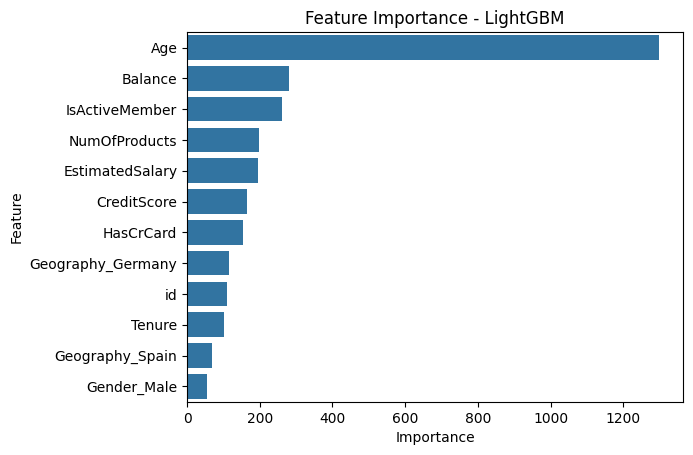

In [89]:
importances = lgb.feature_importances_
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance - LightGBM")
plt.show()


# Saving Models

In [90]:
print(X_train.columns.tolist())
print(len(X_train.columns))


['id', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']
12


In [91]:
import joblib
import os
from sklearn.preprocessing import StandardScaler

# Create models directory if it doesn't exist
# Since notebook is in notebooks/, use ../ to go to parent directory
os.makedirs('../models', exist_ok=True)

# --- Save the scaler ---
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(X_train[num_cols])
joblib.dump(scaler, '../models/bank_churn_scaler.pkl')

print("✅ Scaler saved as '../models/bank_churn_scaler.pkl'")

# --- Save all trained models ---
model_save_map = {
    'LightGBM': '../models/bank_churn_model.pkl',
    'Gradient Boosting': '../models/bank_churn_xgboost.pkl',
    'Random Forest': '../models/bank_churn_rf.pkl',
    'Decision Tree': '../models/bank_churn_dt.pkl',
    'K-Neighbors': '../models/bank_churn_knn.pkl',
    'Logistic Regression': '../models/bank_churn_lr.pkl'
}

for model_name, model_obj in models.items():
    if model_name in model_save_map:
        filename = model_save_map[model_name]
        joblib.dump(model_obj, filename)
        print(f"✅ Saved {model_name} → {filename}")

print("📦 All model files saved successfully in '../models/' folder.")

# --- Save feature order ---
feature_order = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
    'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
    'Geography_Germany', 'Geography_Spain', 'Gender_Male'
]

joblib.dump(feature_order, '../models/feature_order.pkl')
print("✅ Feature order saved as '../models/feature_order.pkl'")

print(f"\n🏆 Best Model Based on Accuracy: {best_model.__class__.__name__} ({round(best_acc, 2)})")


✅ Scaler saved as '../models/bank_churn_scaler.pkl'
✅ Saved Logistic Regression → ../models/bank_churn_lr.pkl
✅ Saved K-Neighbors → ../models/bank_churn_knn.pkl
✅ Saved Random Forest → ../models/bank_churn_rf.pkl
✅ Saved Decision Tree → ../models/bank_churn_dt.pkl
✅ Saved Gradient Boosting → ../models/bank_churn_xgboost.pkl
✅ Saved LightGBM → ../models/bank_churn_model.pkl
📦 All model files saved successfully in '../models/' folder.
✅ Feature order saved as '../models/feature_order.pkl'

🏆 Best Model Based on Accuracy: LGBMClassifier (0.91)


In [92]:
# @title
from IPython.display import HTML as html

html('''
<div style="
    text-align: center;
    font-family: 'Trebuchet MS', sans-serif;
    font-size: 42px;
    font-weight: bold;
    margin-top: 20px;
">
🙏🏻 Thanks a lot 🙏🏻
</div>
''')
